In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential 


In [4]:
df=pd.read_csv('AguaH.csv')
df.head()

,USO2013,TU,DC,M,UL,f.1_ENE_09,f.1_FEB_09,f.1_MAR_09,f.1_ABR_09,f.1_MAY_09,...,f.1_MAR_15,f.1_ABR_15,f.1_MAY_15,f.1_JUN_15,f.1_JUL_15,f.1_AGO_15,f.1_SEP_15,f.1_OCT_15,f.1_NOV_15,f.1_DIC_15
0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,NaN,30.0,30.0,30.0,30.0,...,11.0,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0
2,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0,NaN,NaN,NaN,NaN,NaN,...,6.0,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0
3,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,NaN,NaN,NaN,NaN,NaN,...,17.0,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0
4,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178597 entries, 0 to 178596
Data columns (total 89 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USO2013     178597 non-null  object 
 1   TU          178597 non-null  object 
 2   DC          178597 non-null  float64
 3   M           137526 non-null  object 
 4   UL          135511 non-null  float64
 5   f.1_ENE_09  144882 non-null  float64
 6   f.1_FEB_09  146783 non-null  float64
 7   f.1_MAR_09  147124 non-null  float64
 8   f.1_ABR_09  147558 non-null  float64
 9   f.1_MAY_09  148487 non-null  float64
 10  f.1_JUN_09  149379 non-null  float64
 11  f.1_JUL_09  149873 non-null  float64
 12  f.1_AGO_09  150201 non-null  float64
 13  f.1_SEP_09  150683 non-null  float64
 14  f.1_OCT_09  151141 non-null  float64
 15  f.1_NOV_09  151374 non-null  float64
 16  f.1_DIC_09  151712 non-null  float64
 17  f.1_ENE_10  151931 non-null  float64
 18  f.1_FEB_10  152735 non-null  float64
 19  f.

In [ ]:
# Month mapping for Spanish month abbreviations
month_map = {
    "ENE": 1, "FEB": 2, "MAR": 3, "ABR": 4, "MAY": 5, "JUN": 6,
    "JUL": 7, "AGO": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DIC": 12
}

# Process columns to extract month, year, and value
def extract_month_year_from_value(value, col_name):
    # Split the column name to extract month and year
    parts = col_name.split('_')
    if len(parts) == 3:
        month_abbr = parts[1]
        year = int("20" + parts[2])  # Convert two-digit year to four-digit
        month = month_map.get(month_abbr, None)
        return {"Month": month, "Year": year, "Value": value}
    return None

# Create an empty list to store the transformed data
transformed_data = []

# Loop through each row
for index, row in df.iterrows():
    row_data = {}
    for col in df.columns:
        if "f.1_" in col:
            # Extract the month, year, and value for each feature
            result = extract_month_year_from_value(row[col], col)
            if result:
                # If year is not already in the row_data, initialize it
                year = result['Year']
                if year not in row_data:
                    row_data[year] = []
                row_data[year].append(result['Value'])

    # After processing each row, calculate the mean of values for each year
    aggregated_data = {}
    for year, values in row_data.items():
        aggregated_data[year] = np.sum(values)  # Aggregating by mean

    transformed_data.append(aggregated_data)

# Convert the aggregated data into a DataFrame
aggregated_df = pd.DataFrame(transformed_data)

# Rename the columns to reflect the years and remove 'Feature' year column
aggregated_df.columns = [str(year) for year in aggregated_df.columns]




In [57]:
aggregated_df

,2009,2010,2011,2012,2013,2014,2015
0,240.0,240.0,170.0,120.0,167.0,37.0,132.0
1,NaN,360.0,360.0,360.0,359.0,169.0,151.0
2,NaN,NaN,NaN,NaN,NaN,NaN,97.0
3,NaN,NaN,197.0,180.0,159.0,226.0,179.0
4,240.0,240.0,240.0,240.0,260.0,340.0,304.0
...,...,...,...,...,...,...,...
178592,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0
178593,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0
178594,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0
178595,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0


In [58]:
df=pd.concat([aggregated_df,df],axis=1)

In [59]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,TU,DC,M,UL,f.1_ENE_09,f.1_FEB_09,f.1_MAR_09,f.1_ABR_09,f.1_MAY_09,f.1_JUN_09,f.1_JUL_09,f.1_AGO_09,f.1_SEP_09,f.1_OCT_09,f.1_NOV_09,f.1_DIC_09,f.1_ENE_10,f.1_FEB_10,f.1_MAR_10,f.1_ABR_10,f.1_MAY_10,f.1_JUN_10,f.1_JUL_10,f.1_AGO_10,f.1_SEP_10,f.1_OCT_10,f.1_NOV_10,f.1_DIC_10,f.1_ENE_11,f.1_FEB_11,f.1_MAR_11,f.1_ABR_11,f.1_MAY_11,f.1_JUN_11,f.1_JUL_11,f.1_AGO_11,f.1_SEP_11,f.1_OCT_11,f.1_NOV_11,f.1_DIC_11,f.1_ENE_12,f.1_FEB_12,f.1_MAR_12,f.1_ABR_12,f.1_MAY_12,f.1_JUN_12,f.1_JUL_12,f.1_AGO_12,f.1_SEP_12,f.1_OCT_12,f.1_NOV_12,f.1_DIC_12,f.1_ENE_13,f.1_FEB_13,f.1_MAR_13,f.1_ABR_13,f.1_MAY_13,f.1_JUN_13,f.1_JUL_13,f.1_AGO_13,f.1_SEP_13,f.1_OCT_13,f.1_NOV_13,f.1_DIC_13,f.1_ENE_14,f.1_FEB_14,f.1_MAR_14,f.1_ABR_14,f.1_MAY_14,f.1_JUN_14,f.1_JUL_14,f.1_AGO_14,f.1_SEP_14,f.1_OCT_14,f.1_NOV_14,f.1_DIC_14,f.1_ENE_15,f.1_FEB_15,f.1_MAR_15,f.1_ABR_15,f.1_MAY_15,f.1_JUN_15,f.1_JUL_15,f.1_AGO_15,f.1_SEP_15,f.1_OCT_15,f.1_NOV_15,f.1_DIC_15
0,240.0,240.0,170.0,120.0,167.0,37.0,132.0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,24.0,24.0,24.0,24.0,1.0,17.0,0.0,14.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,NaN,360.0,360.0,360.0,359.0,169.0,151.0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,NaN,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,29.0,29.0,29.0,0.0,11.0,20.0,19.0,0.0,16.0,10.0,12.0,12.0,11.0,0.0,8.0,11.0,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0
2,NaN,NaN,NaN,NaN,NaN,NaN,97.0,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,16.0,12.0,11.0,9.0,9.0,7.0,11.0,7.0,11.0,8.0,6.0,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0
3,NaN,NaN,197.0,180.0,159.0,226.0,179.0,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,4.0,34.0,18.0,9.0,24.0,20.0,15.0,7.0,8.0,8.0,7.0,11.0,10.0,16.0,17.0,15.0,25.0,23.0,17.0,13.0,13.0,13.0,2.0,13.0,11.0,0.0,8.0,7.0,6.0,54.0,20.0,12.0,9.0,17.0,5.0,19.0,0.0,13.0,9.0,9.0,49.0,30.0,23.0,21.0,23.0,25.0,0.0,13.0,17.0,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0
4,240.0,240.0,240.0,240.0,260.0,340.0,304.0,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,23.0,23.0,0.0,72.0,27.0,27.0,42.0,30.0,0.0,31.0,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178592,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,RHC,COMERCIAL,3.0,ADCOM,6614.0,2574.0,1685.0,1141.0,1316.0,1521.0,2388.0,2620.0,3403.0,3785.0,4551.0,3156.0,1155.0,860.0,1002.0,667.0,1048.0,1300.0,999.0,3594.0,3972.0,198.0,1152.0,1037.0,803.0,905.0

In [60]:
feature=[col for col in df.columns if "f.1_" in col]
df.drop(feature,axis=1,inplace=True)

In [61]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,TU,DC,M,UL
0,240.0,240.0,170.0,120.0,167.0,37.0,132.0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0
1,NaN,360.0,360.0,360.0,359.0,169.0,151.0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0
2,NaN,NaN,NaN,NaN,NaN,NaN,97.0,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0
3,NaN,NaN,197.0,180.0,159.0,226.0,179.0,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0
4,240.0,240.0,240.0,240.0,260.0,340.0,304.0,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
178592,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,RHC,COMERCIAL,3.0,ADCOM,6614.0
178593,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,MX,COMERCIAL,3.0,ADCOM,6614.0
178594,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,RHC,COMERCIAL,3.0,ADCOM,6614.0
178595,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,MX,COMERCIAL,3.0,ADCOM,6614.0


In [62]:
monthly_columns = [col for col in df.columns if col.startswith('20')]

# Calculate the mean across these columns for each row
df['consumption'] = df[monthly_columns].mean(axis=1)

In [63]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,TU,DC,M,UL,consumption
0,240.0,240.0,170.0,120.0,167.0,37.0,132.0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,158.000000
1,NaN,360.0,360.0,360.0,359.0,169.0,151.0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,293.166667
2,NaN,NaN,NaN,NaN,NaN,NaN,97.0,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0,97.000000
3,NaN,NaN,197.0,180.0,159.0,226.0,179.0,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,188.200000
4,240.0,240.0,240.0,240.0,260.0,340.0,304.0,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,266.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178592,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,RHC,COMERCIAL,3.0,ADCOM,6614.0,34000.285714
178593,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,MX,COMERCIAL,3.0,ADCOM,6614.0,34000.285714
178594,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,RHC,COMERCIAL,3.0,ADCOM,6614.0,34000.285714
178595,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,MX,COMERCIAL,3.0,ADCOM,6614.0,34000.285714


In [64]:
value=df.isnull().sum(axis=1)
print(value)

0         0
1         1
2         6
3         2
4         2
         ..
178592    0
178593    0
178594    0
178595    0
178596    0
Length: 178597, dtype: int64


In [65]:
value.value_counts().sort_index()

,count
0,111808
1,8988
2,32031
3,5965
4,4787
5,3401
6,3576
7,759
8,3222
9,185


In [66]:
df=df[df.isnull().sum(axis=1)<=5].reset_index()
df.drop('index',axis=1,inplace=True)

In [67]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,TU,DC,M,UL,consumption
0,240.0,240.0,170.0,120.0,167.0,37.0,132.0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,158.000000
1,NaN,360.0,360.0,360.0,359.0,169.0,151.0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,293.166667
2,NaN,NaN,197.0,180.0,159.0,226.0,179.0,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,188.200000
3,240.0,240.0,240.0,240.0,260.0,340.0,304.0,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,266.285714
4,201.0,246.0,322.0,200.0,217.0,211.0,227.0,H3,DOMESTICO MEDIO,0.5,NaN,NaN,232.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166975,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,RHC,COMERCIAL,3.0,ADCOM,6614.0,34000.285714
166976,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,MX,COMERCIAL,3.0,ADCOM,6614.0,34000.285714
166977,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,RHC,COMERCIAL,3.0,ADCOM,6614.0,34000.285714
166978,29295.0,16632.0,15661.0,18286.0,40289.0,56524.0,61315.0,MX,COMERCIAL,3.0,ADCOM,6614.0,34000.285714


In [68]:
df.duplicated().sum()

11056

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df.duplicated().sum()

0

In [71]:
df.isnull().sum()

,0
2009,21879
2010,15203
2011,10001
2012,5466
2013,2832
2014,813
2015,211
USO2013,0
TU,0
DC,0


In [72]:
df['M'].unique()

array(['MSDELAUNET', 'CICASA MMD-15 S', nan, 'Cicasa NG 1/2', 'DOROT',
       'CICASA / DE LA UNET', 'AZTECA', 'BADGERMETER', 'Delaunet MD-100',
       'ELSTER', 'ADCOM', 'ACTARIS', 'SENSUS', 'SHLUMBERGER',
       'Otras / desconocida', 'KENT', 'TONHY', 'Cicasa NG 3/4', 'ARAD',
       'INVENSYS', 'SAPPEL', 'INVERCONTA', 'ABB', 'BAR-METERS 1"',
       'ENDRESS-HOUSER', 'Kent ABB', 'Delaunet MD-50', 'Delaunet MMD-19',
       'PRECISA II', 'ALFA', 'MASTER', 'Badger combinado', 'Iberconta',
       'Azteca 3VM', 'Badger M25 Bronce', 'RECORDAL', 'ZENNER 1/2',
       'GENERICA', 'Delaunet MD-19', 'Delaunet UD-15', 'EWE',
       'Delaunet MD-15', 'Y-T MD-15', 'Delaunet WD-100', 'AV3STARS',
       'SAPPEL AQUARIUS', 'Badger RCDLL-25', 'Delaunet MD-40', 'MEXICANO',
       'NEPTUNE', 'Delaunet Aurus 3UM-15', 'AQUARIUS', 'IESA', 'MENECKE'],
      dtype=object)

In [76]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Motor measurment']=encoder.fit_transform(df['M'])
df['metric']=encoder.fit_transform(df['USO2013'])

KeyError: 'M'

In [77]:
df['metric']=encoder.fit_transform(df['USO2013'])

In [74]:
df.drop('M',axis=1,inplace=True)


In [79]:
df.drop('USO2013',axis=1,inplace=True)


In [81]:
df.drop('TU',axis=1,inplace=True)

In [82]:
corr=df.corr()

<Axes: >

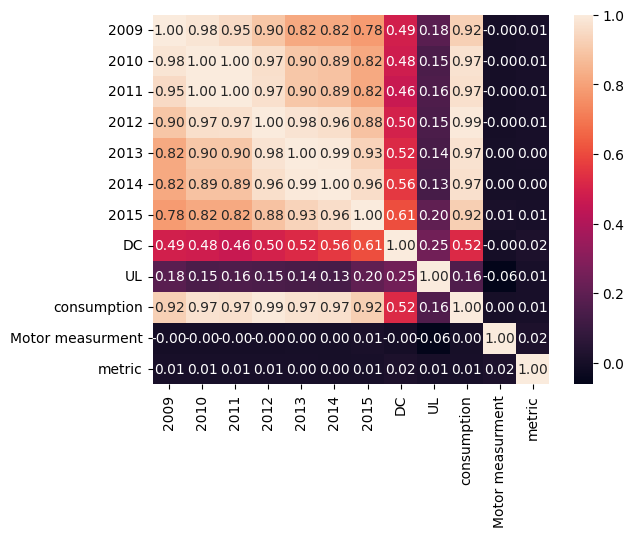

In [86]:
sns.heatmap(corr,annot=True,fmt='.2f')